In [2]:
#import dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
## load the data

raw_data = pd.read_csv('dataset/NFLX.csv')
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [5]:
# get the number of trading days

raw_data.shape

(1007, 7)

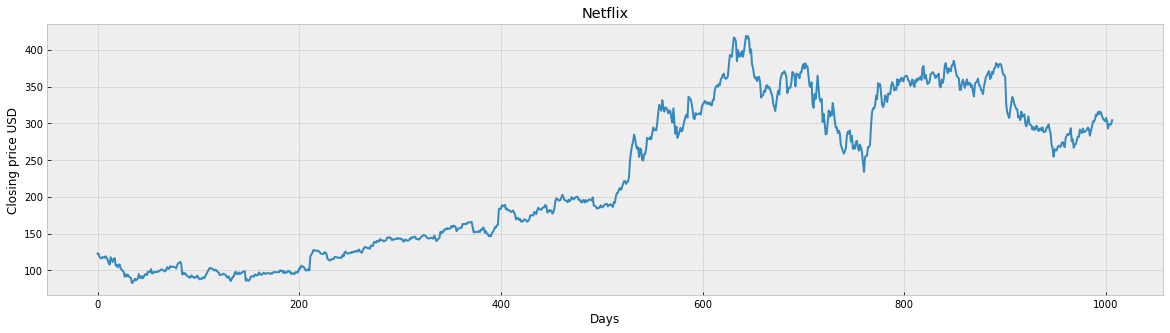

In [6]:
## visualize the close price data

plt.figure(figsize=(20,5))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Closing price USD')
plt.plot(raw_data['Close'])
plt.show()

In [7]:
## get the close price

df = raw_data[['Close']]
df.head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [22]:
## create a variable to predict x days out into the future 

future_days = 25

# create a new column shifted x days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(30)

<ipython-input-22-61cb7c66827f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
0,122.639999,99.120003
1,122.510002,97.830002
2,118.019997,91.150002
3,116.629997,94.410004
4,116.239998,91.839996
5,118.160004,94.089996
6,117.330002,91.489998
7,117.110001,90.739998
8,119.120003,89.709999
9,116.709999,82.790001


In [9]:
df.tail()

,Close,Prediction
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [10]:
## create a feature dataset X and convert it to a numpy array and remove the last 'x' rows or days
X = np.array(df.drop(['Prediction'],1))[:-future_days]

In [13]:
## create a target dataset y and convert it to a numpy array and remove the last 'x' rows of data
y = np.array(df.drop(['Close'],1))[:-future_days]

In [15]:
y.shape

(982, 1)

In [16]:
X.shape

(982, 1)

In [19]:
## split the data into 75 trainig and 25 testing

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [20]:
## create the model
## create a decision tree regressor model

tree = DecisionTreeRegressor().fit(X_train,y_train)

## create linear regressor model
reg = LinearRegression().fit(X_train,y_train)

In [29]:
df['Close'][:-future_days]

0      122.639999
1      122.510002
2      118.019997
3      116.629997
4      116.239998
          ...    
977    292.859985
978    288.029999
979    288.589996
980    289.570007
981    291.570007
Name: Close, Length: 982, dtype: float64

In [23]:
## get the last x-rows of the feature dataset

X_future = df.drop(['Prediction'],1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [24]:
## show model tree prediction

In [25]:
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()

# model linear prediciton
lr_prediction = reg.predict(X_future)
print(lr_prediction)


[339.100006 276.820007 283.109985 289.619995 295.029999 302.570007
 302.600006 253.669998 311.690002 310.480011 315.549988 312.48999
 315.929993 314.660004 309.98999  306.160004 304.320007 267.529999
 307.350006 302.5      293.119995 298.929993 298.440002 298.5
 271.269989]

[[276.91824073]
 [273.36132991]
 [270.32748419]
 [282.64357003]
 [284.97362104]
 [287.44635211]
 [286.22901135]
 [288.15963828]
 [294.88355584]
 [277.71711838]
 [280.33250098]
 [269.52860654]
 [273.88439502]
 [274.10314657]
 [279.16272975]
 [283.95599184]
 [283.33781621]
 [293.07656993]
 [289.23432752]
 [288.66369288]
 [294.41752224]
 [289.82397266]
 [290.35655681]
 [291.28859452]
 [293.19069096]]


In [26]:
df.head()

,Close,Prediction
0,122.639999,99.120003
1,122.510002,97.830002
2,118.019997,91.150002
3,116.629997,94.410004
4,116.239998,91.839996


In [28]:
df[X.shape[0]:]

,Close,Prediction
982,294.179993,NaN
983,292.010010,NaN
984,283.109985,NaN
985,289.619995,NaN
986,295.029999,NaN
987,302.570007,NaN
988,302.600006,NaN
989,305.160004,NaN
990,311.690002,NaN
991,310.480011,NaN


<ipython-input-31-e19629cfd712>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = prediction ## replacing nan with predicted values


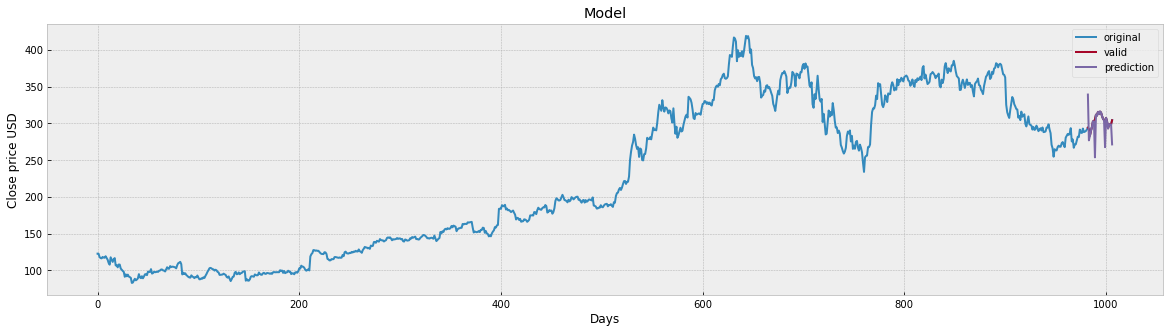

In [31]:
## visualize the data

prediction = tree_prediction
valid = df[X.shape[0]:]
valid['predictions'] = prediction ## replacing nan with predicted values 
plt.figure(figsize=(20,5))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','valid','prediction'])
plt.show()


<ipython-input-32-87075013e07a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = prediction ## replacing nan with predicted values


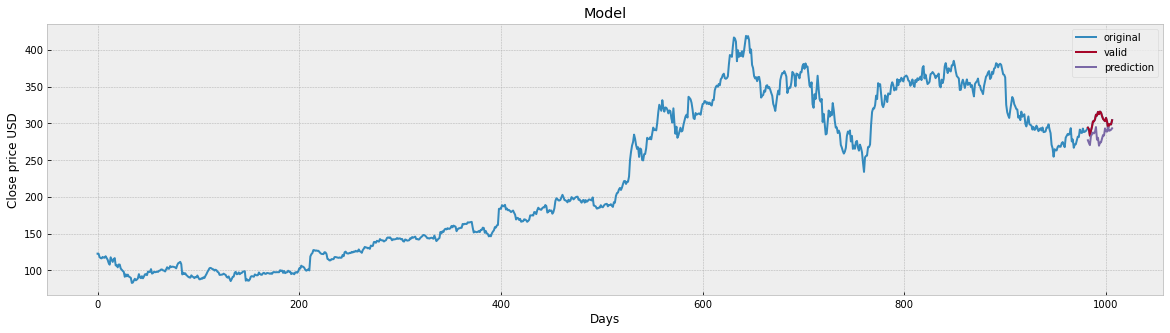

In [32]:
## visualize the data

prediction = lr_prediction
valid = df[X.shape[0]:]
valid['predictions'] = prediction ## replacing nan with predicted values 
plt.figure(figsize=(20,5))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['original','valid','prediction'])
plt.show()


In [33]:
## has even worse performance 